Terceiro projeto de Inteligência artificial

Alunos: Lucas Garavaglia, Milena Santos

## imports necessários

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import numpy as np


from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier

## Carregamento do Dataset

In [4]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv")

## Limpando dataset

In [11]:
dataset['class'] = [True if x == 'Positive' else False for x in dataset['class']]
dataset['Gender'] = [True if x == 'Male' else False for x in dataset['Gender']]
dataset['Polyuria'] = [True if x == 'Yes' else False for x in dataset['Polyuria']]
dataset['Polydipsia'] = [True if x == 'Yes' else False for x in dataset['Polydipsia']]
dataset['weakness'] = [True if x == 'Yes' else False for x in dataset['weakness']]
dataset['Polyphagia'] = [True if x == 'Yes' else False for x in dataset['Polyphagia']]
dataset['Itching'] = [True if x == 'Yes' else False for x in dataset['Itching']]
dataset['Irritability'] = [True if x == 'Yes' else False for x in dataset['Irritability']]
dataset['Alopecia'] = [True if x == 'Yes' else False for x in dataset['Alopecia']]
dataset['Obesity'] = [True if x == 'Yes' else False for x in dataset['Obesity']]
dataset['delayed healing'] = [True if x == 'Yes' else False for x in dataset['delayed healing']]
dataset['partial paresis'] = [True if x == 'Yes' else False for x in dataset['partial paresis']]
dataset['muscle stiffness'] = [True if x == 'Yes' else False for x in dataset['muscle stiffness']]
dataset['Genital thrush'] = [True if x == 'Yes' else False for x in dataset['Genital thrush']]
dataset['visual blurring'] = [True if x == 'Yes' else False for x in dataset['visual blurring']]
dataset['sudden weight loss'] = [True if x == 'Yes' else False for x in dataset['sudden weight loss']]

Normalização dos dados

In [12]:
# Separação dos dados preditivos e dos valores
X = dataset.drop(['class'], axis=1).copy()
Y = dataset['class'].copy()

# Normalização
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
normalized_dataset = X
normalized_dataset["Result"] = Y
normalized_dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Result
0,0.324324,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,True
1,0.567568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,True
2,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,True
3,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,True
4,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.310811,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,True
516,0.432432,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,True
517,0.567568,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,True
518,0.216216,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,False


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

False

Matriz de confusão

86.53846153846155
Confusion matrix:
 [[53  3]
 [18 82]]


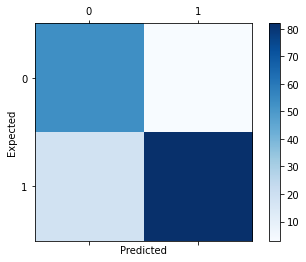

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['class'], axis=1), dataset['class'], test_size=0.3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Class 0: 200
Class 1: 320
Proporção: 1.6 : 1


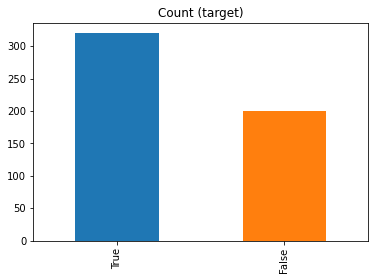

In [18]:
target_count = dataset["class"].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proporção:', round(target_count[1] / target_count[0], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);